# This analysis tool and software is copy righted by Vishwanath Akuthota from 03/08/2020

This notebook tracks the spread of the novel coronavirus, also known as SARS-CoV-2. It is a contagious respiratory virus that first started in Wuhan in December 2019. On 2/11/2020, the disease is officially named COVID-19 by the World Health Organization.
Data: https://github.com/CSSEGISandData/COVID-19. A big thank you to Johns Hopkins for providing the data. 
        
Learn more from the WHO
Learn more from the CDC
Map Visualizations from Johns Hopkins
Feel free to provide me with feedbacks. Last update: 3/9/2020 9:25 PM
Make sure you run the notebook to see the graphs better. Some diagrams are hard to see in the default view. 

In [7]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
%matplotlib inline 

Import the data (make sure you update this on a daily basis)

In [8]:
#df = pd.read_csv(url, error_bad_lines=False)

confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')

deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')

recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')

#url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
#df = pd.read_csv(url, error_bad_lines=False)

#url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
#deaths_df = pd.read_csv(url, error_bad_lines=False)

#url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'
#recoveries_df = pd.read_csv(url, error_bad_lines=False)

In [9]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20
0,Anhui,Mainland China,31.8257,117.2264,1,9,15,39,60,70,...,990,990,990,990,990,990,990,990,990,990
1,Beijing,Mainland China,40.1824,116.4142,14,22,36,41,68,80,...,411,413,414,414,418,418,422,426,428,428
2,Chongqing,Mainland China,30.0572,107.8740,6,9,27,57,75,110,...,576,576,576,576,576,576,576,576,576,576
3,Fujian,Mainland China,26.0789,117.9874,1,5,10,18,35,59,...,296,296,296,296,296,296,296,296,296,296
4,Gansu,Mainland China,36.0611,103.8343,0,2,2,4,7,14,...,91,91,91,91,91,102,119,120,124,124


In [10]:
deaths_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20
0,Anhui,Mainland China,31.8257,117.2264,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
1,Beijing,Mainland China,40.1824,116.4142,0,0,0,0,0,1,...,8,8,8,8,8,8,8,8,8,8
2,Chongqing,Mainland China,30.0572,107.8740,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
3,Fujian,Mainland China,26.0789,117.9874,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,Gansu,Mainland China,36.0611,103.8343,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,"Collin County, TX",US,33.1795,-96.4930,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
262,"Jefferson County, KY",US,38.1938,-85.6435,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
263,"Jefferson Parish, LA",US,29.6499,-90.1121,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
264,"Shasta County, CA",US,40.7909,-121.8474,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
recoveries_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20
0,Anhui,Mainland China,31.8257,117.2264,0,0,0,0,0,0,...,868,873,917,936,956,970,979,979,984,984
1,Beijing,Mainland China,40.1824,116.4142,0,0,1,2,2,2,...,271,276,282,288,297,297,299,303,308,315
2,Chongqing,Mainland China,30.0572,107.8740,0,0,0,0,0,0,...,438,450,469,490,502,512,513,526,527,542
3,Fujian,Mainland China,26.0789,117.9874,0,0,0,0,0,0,...,243,247,255,260,270,277,284,295,295,295
4,Gansu,Mainland China,36.0611,103.8343,0,0,0,0,0,0,...,82,84,85,86,87,87,87,87,87,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,"Collin County, TX",US,33.1795,-96.4930,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
262,"Jefferson County, KY",US,38.1938,-85.6435,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
263,"Jefferson Parish, LA",US,29.6499,-90.1121,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
264,"Shasta County, CA",US,40.7909,-121.8474,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
cols = confirmed_df.keys()

Get all the dates for the outbreak

In [13]:
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]

In [14]:
dates = confirmed.keys()
world_cases = []
total_deaths = [] 
mortality_rate = []
total_recovered = [] 

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    total_recovered.append(recovered_sum)

In [15]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

Future forcasting

In [16]:
days_in_future = 5
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)

Convert integer into datetime for better visualization

In [17]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))
adjusted_dates = future_forcast_dates[:-5]

In [18]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, world_cases, test_size=0.1, shuffle=False) 

Model for predicting # of confirmed cases. I am using support vector machine, bayesian ridge , and linear regression in this example. 

In [19]:
kernel = ['linear', 'poly', 'sigmoid', 'rbf']
c = [0.01, 0.1, 1, 10]
gamma = [0.01, 0.1, 1]
epsilon = [0.01, 0.1, 1]
shrinking = [True, False]
svm_grid = {'kernel': kernel, 'C': c, 'gamma' : gamma, 'epsilon': epsilon, 'shrinking' : shrinking}

svm = SVR()
svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
svm_search.fit(X_train_confirmed, y_train_confirmed)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  97 out of 120 | elapsed:    1.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    1.8s finished
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='scale', kernel='rbf',
                                 max_iter=-1, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='deprecated', n_iter=40, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'epsilon': [0.01, 0.1, 1],
                                        'gamma': [0.01, 0.1, 1],
                                        'kernel': ['linear', 'poly', 'sigmoid',
                                                   'rbf'],
                                        'shrinking': [True, False]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [20]:
svm_search.best_params_

{'shrinking': False, 'kernel': 'linear', 'gamma': 1, 'epsilon': 0.01, 'C': 10}

In [21]:
svm_confirmed = svm_search.best_estimator_
svm_pred = svm_confirmed.predict(future_forcast)

MAE: 3561.999473684208
MSE: 18023391.608310528


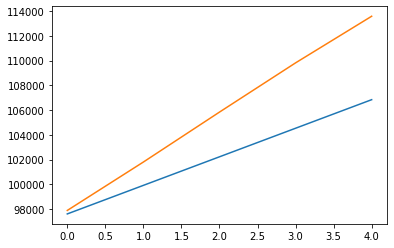

In [22]:
# check against testing data
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(svm_test_pred)
plt.plot(y_test_confirmed)
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))

In [23]:
linear_model = LinearRegression(normalize=True)
linear_model.fit(X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(X_test_confirmed)
linear_pred = linear_model.predict(future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))

MAE: 4757.448746602235
MSE: 26271282.287748296


In [24]:
linear_model.coef_

array([[2593.13168227]])

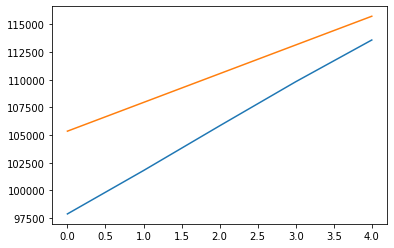

In [25]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)

In [26]:
tol = [1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4]

bayesian_grid = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 'lambda_1': lambda_1, 'lambda_2' : lambda_2}

bayesian = BayesianRidge()
bayesian_search = RandomizedSearchCV(bayesian, bayesian_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
bayesian_search.fit(X_train_confirmed, y_train_confirmed)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    0.1s finished
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=BayesianRidge(alpha_1=1e-06, alpha_2=1e-06,
                                           alpha_init=None, compute_score=False,
                                           copy_X=True, fit_intercept=True,
                                           lambda_1=1e-06, lambda_2=1e-06,
                                           lambda_init=None, n_iter=300,
                                           normalize=False, tol=0.001,
                                           verbose=False),
                   iid='deprecated', n_iter=40, n_jobs=-1,
                   param_distributions={'alpha_1': [1e-07, 1e-06, 1e-05,
                                                    0.0001],
                                        'alpha_2': [1e-07, 1e-06, 1e-05,
                                                    0.0001],
                                        'lambda_1': [1e-07, 1e-06, 1e-05,
                                                 

In [27]:
bayesian_search.best_params_

{'tol': 0.0001,
 'lambda_2': 1e-06,
 'lambda_1': 1e-07,
 'alpha_2': 1e-05,
 'alpha_1': 0.0001}

In [28]:
bayesian_confirmed = bayesian_search.best_estimator_
test_bayesian_pred = bayesian_confirmed.predict(X_test_confirmed)
bayesian_pred = bayesian_confirmed.predict(future_forcast)
print('MAE:', mean_absolute_error(test_bayesian_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_bayesian_pred, y_test_confirmed))

MAE: 4699.3557216336685
MSE: 25734970.88722933


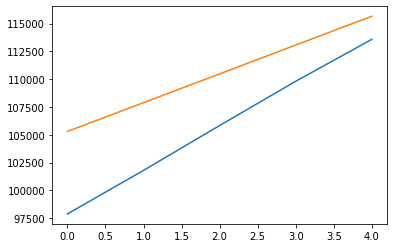

In [29]:
plt.plot(y_test_confirmed)
plt.plot(test_bayesian_pred)

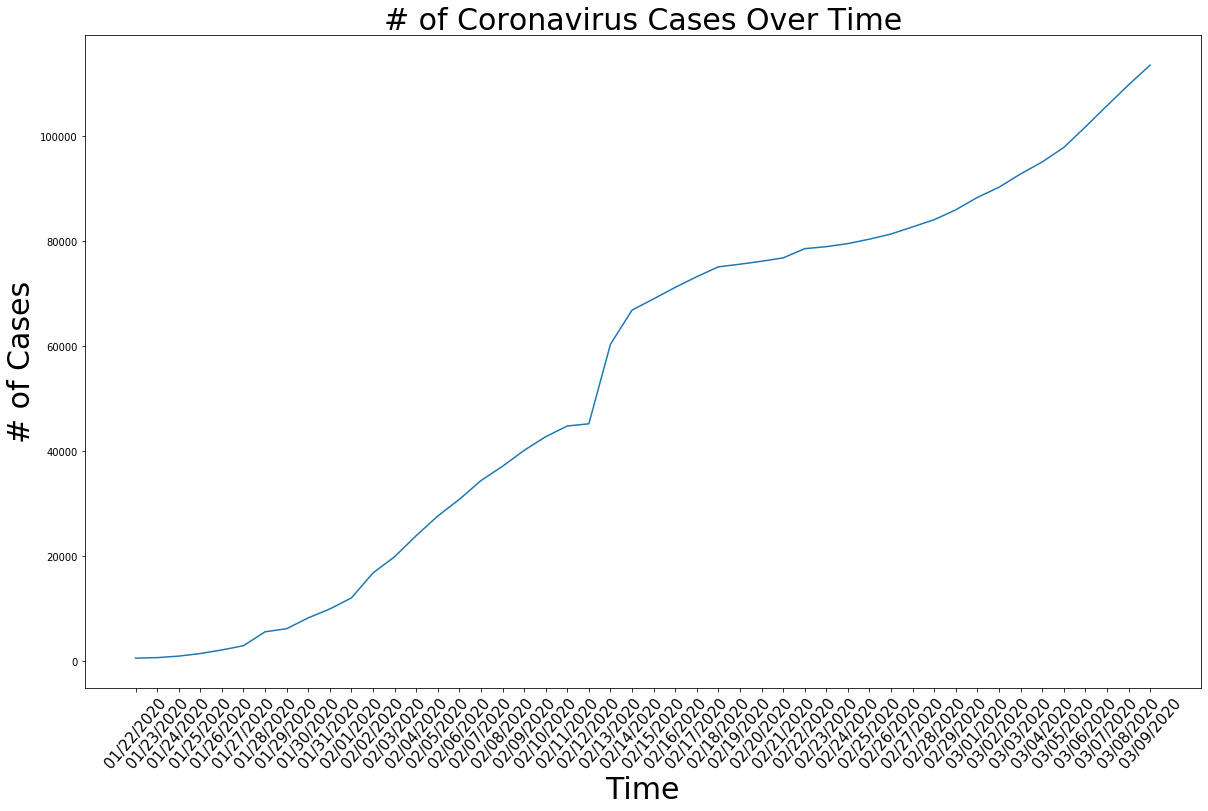

In [30]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, world_cases)
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(rotation=50, size=15)
plt.show()

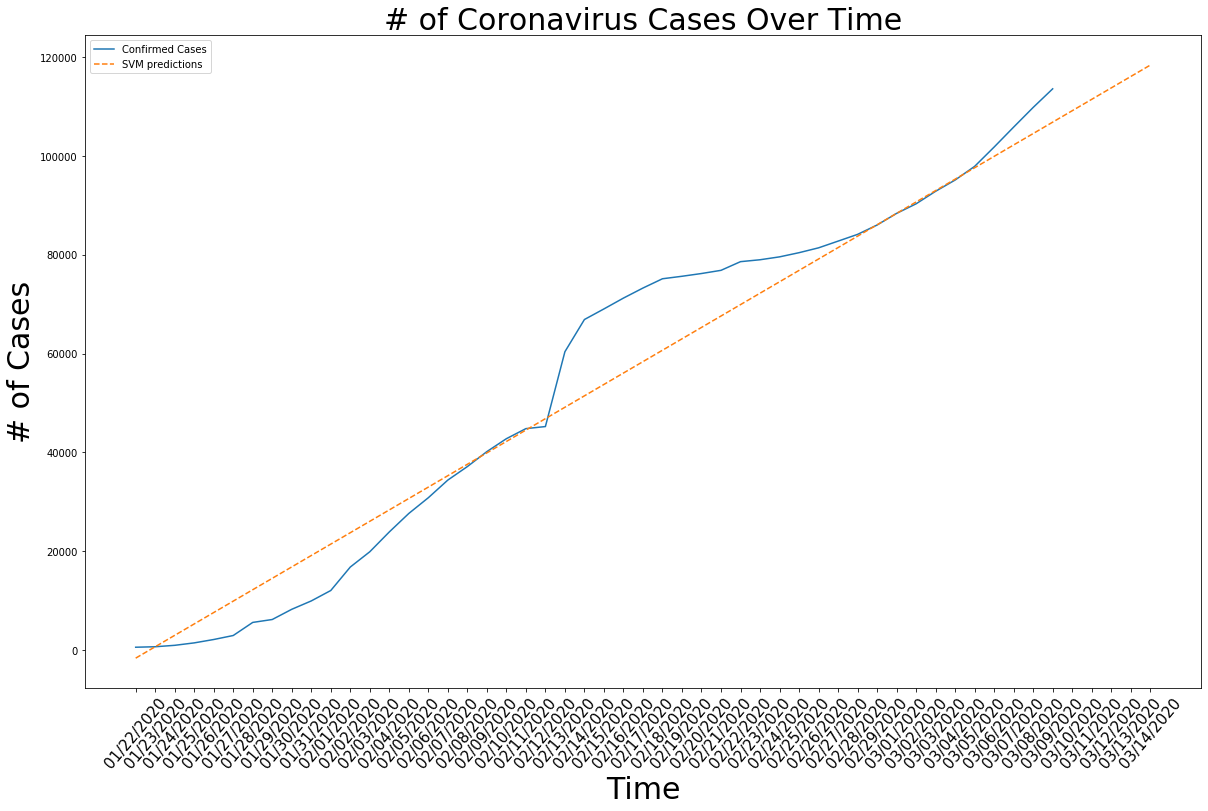

In [31]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forcast_dates, svm_pred, linestyle='dashed')
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Confirmed Cases', 'SVM predictions'])
plt.xticks(rotation=50, size=15)
plt.show()

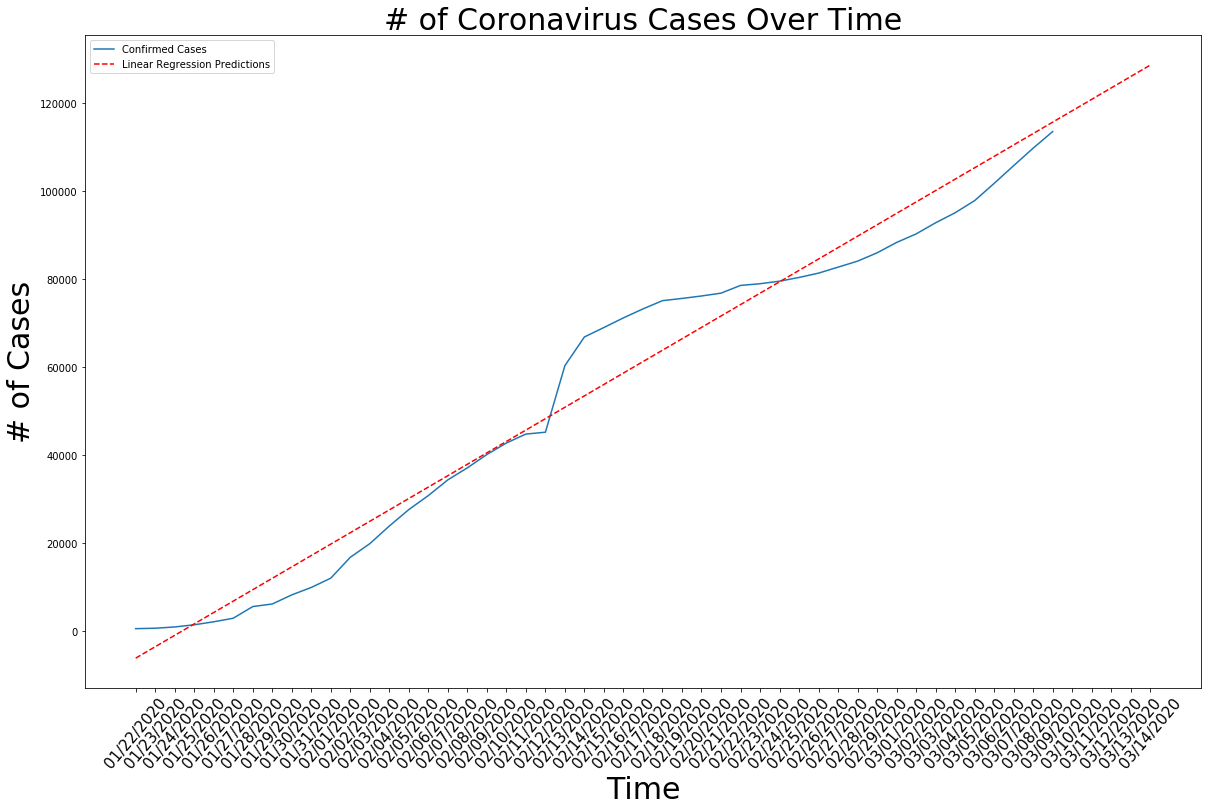

In [32]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forcast_dates, linear_pred, linestyle='dashed', color='red')
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Confirmed Cases', 'Linear Regression Predictions'])
plt.xticks(rotation=50, size=15)
plt.show()

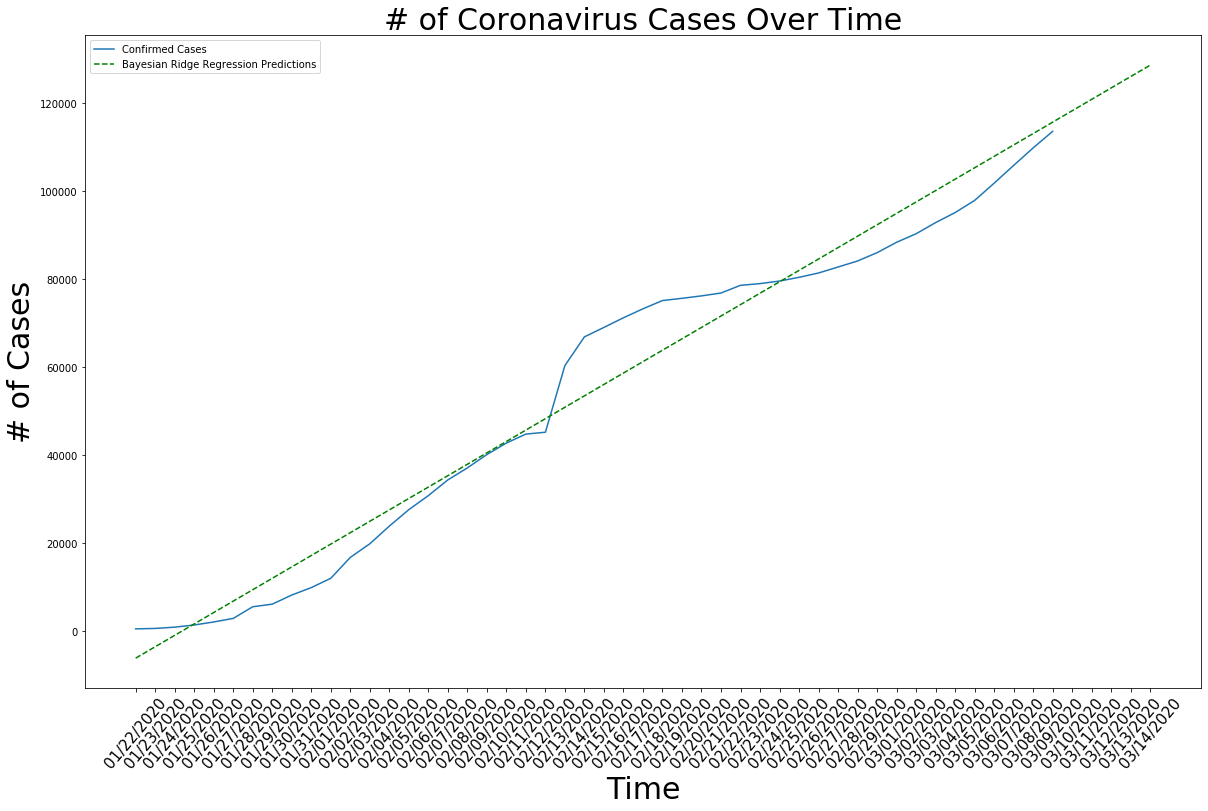

In [33]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forcast_dates, bayesian_pred, linestyle='dashed', color='green')
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Confirmed Cases', 'Bayesian Ridge Regression Predictions'])
plt.xticks(rotation=50, size=15)
plt.show()

In [70]:
# Future predictions using SVM 
print('SVM future predictions:')
set(zip(future_forcast_dates[-5:], svm_pred[-5:]))

SVM future predictions:


{('03/10/2020', 109146.30578947371),
 ('03/11/2020', 111454.6742105263),
 ('03/12/2020', 113763.04263157897),
 ('03/13/2020', 116071.41105263158),
 ('03/14/2020', 118379.77947368422)}

In [35]:
# Future predictions using Linear Regression 
print('Ridge regression future predictions:')
set(zip(future_forcast_dates[-5:], bayesian_pred[-5:]))

Ridge regression future predictions:


{('03/10/2020', 118254.68914032626),
 ('03/11/2020', 120845.40027989044),
 ('03/12/2020', 123436.11141945464),
 ('03/13/2020', 126026.82255901882),
 ('03/14/2020', 128617.53369858302)}

In [36]:
# Future predictions using Linear Regression 
print('Linear regression future predictions:')
print(linear_pred[-5:])

Linear regression future predictions:
[[118320.04379342]
 [120913.17547569]
 [123506.30715796]
 [126099.43884023]
 [128692.5705225 ]]


 Graphing the number of confirmed cases, deaths, and the mortality rate over time, as well as the number of recoveries

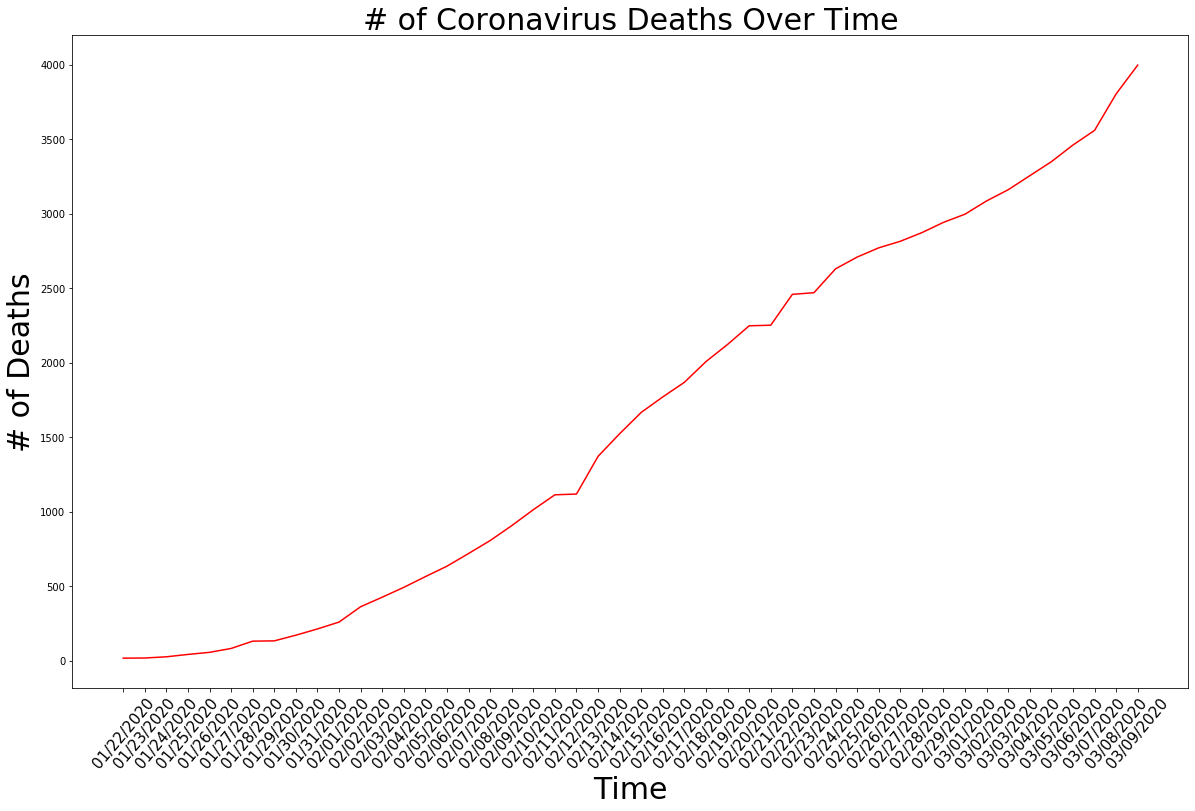

In [37]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, total_deaths, color='red')
plt.title('# of Coronavirus Deaths Over Time', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('# of Deaths', size=30)
plt.xticks(rotation=50, size=15)
plt.show()

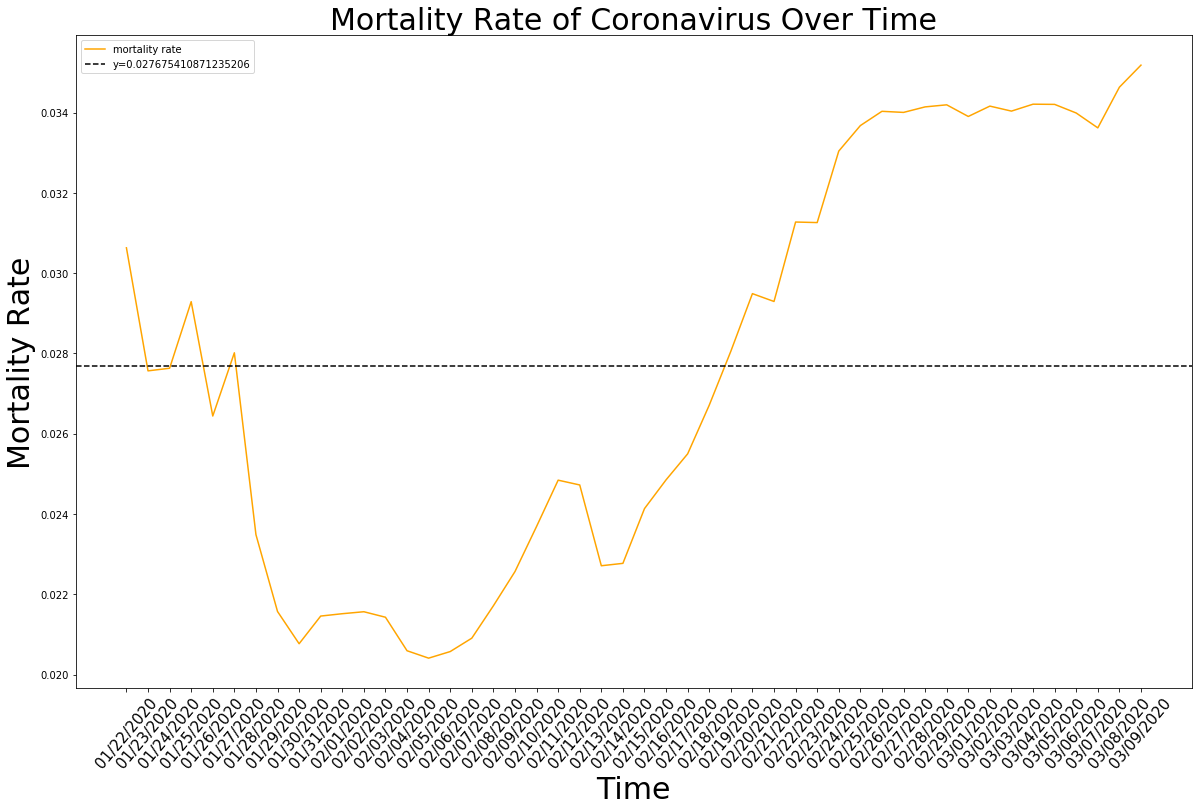

In [38]:
mean_mortality_rate = np.mean(mortality_rate)
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, mortality_rate, color='orange')
plt.axhline(y = mean_mortality_rate,linestyle='--', color='black')
plt.title('Mortality Rate of Coronavirus Over Time', size=30)
plt.legend(['mortality rate', 'y='+str(mean_mortality_rate)])
plt.xlabel('Time', size=30)
plt.ylabel('Mortality Rate', size=30)
plt.xticks(rotation=50, size=15)
plt.show()

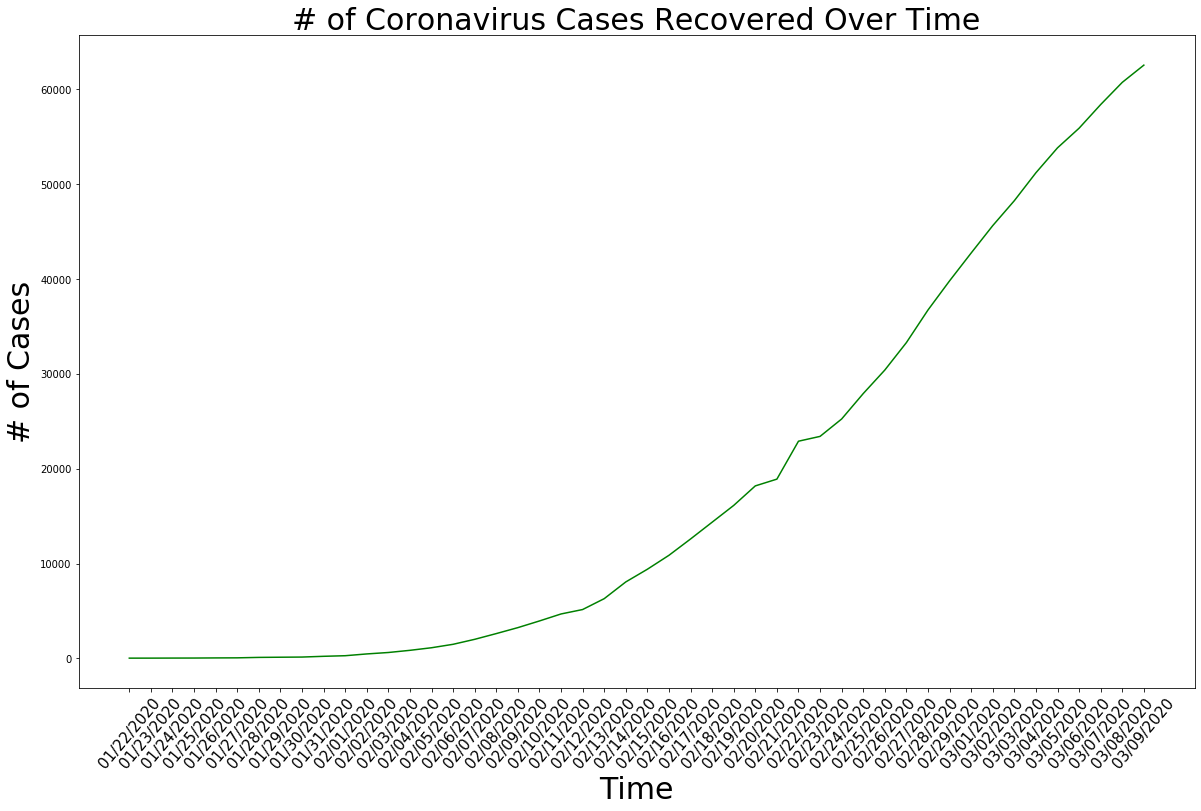

In [39]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, total_recovered, color='green')
plt.title('# of Coronavirus Cases Recovered Over Time', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(rotation=50, size=15)
plt.show()

Graphing the number of deaths and the number of recoveries

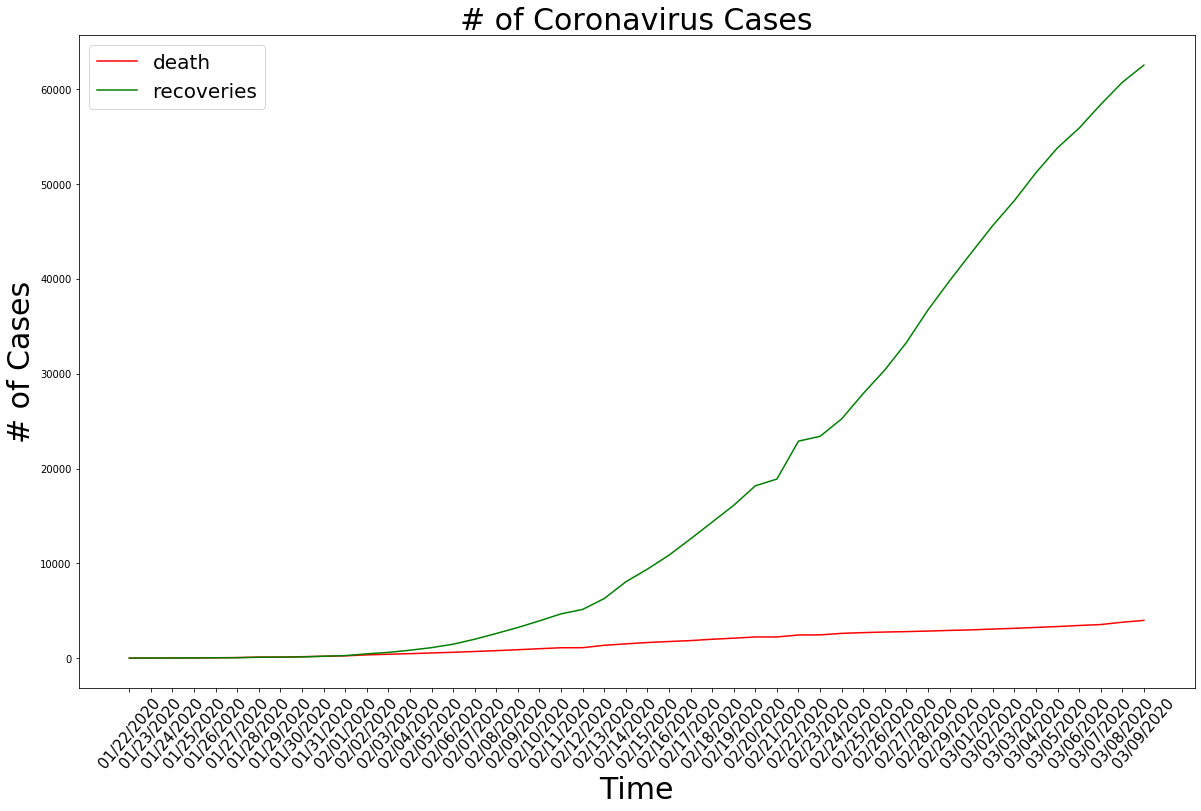

In [40]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, total_deaths, color='r')
plt.plot(adjusted_dates, total_recovered, color='green')
plt.legend(['death', 'recoveries'], loc='best', fontsize=20)
plt.title('# of Coronavirus Cases', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(rotation=50, size=15)
plt.show()

Plotting the number of deaths against the number of recoveries

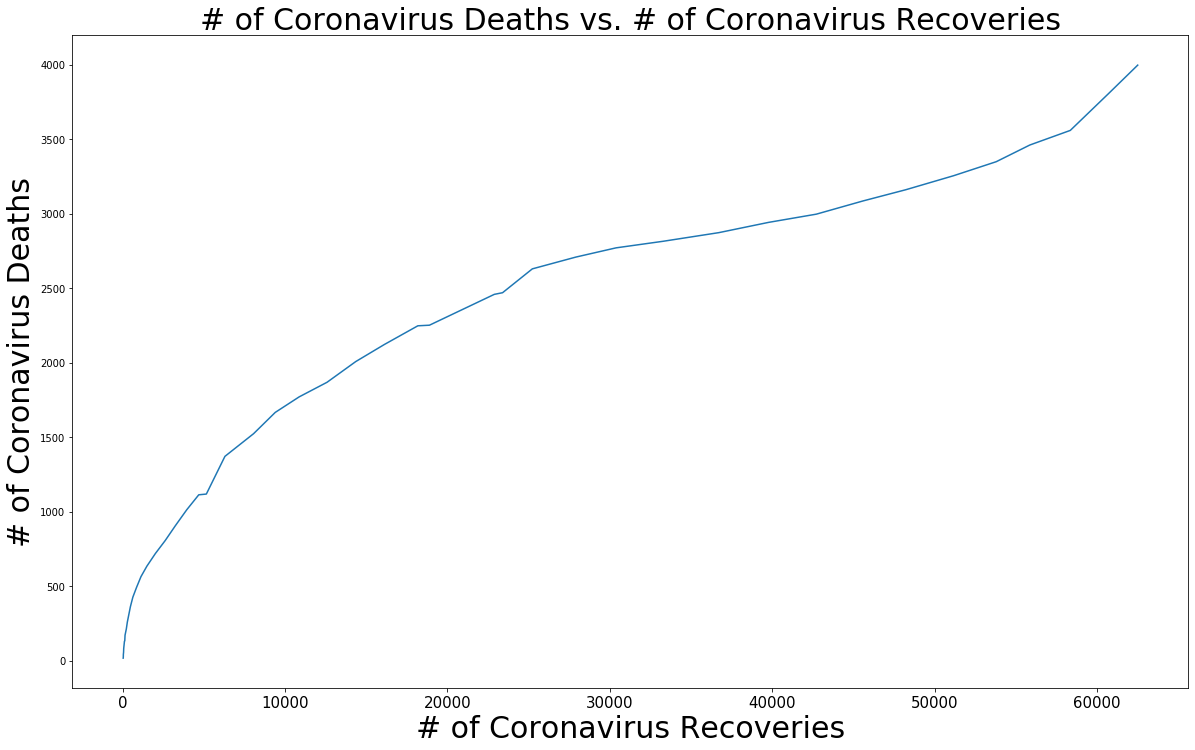

In [41]:
plt.figure(figsize=(20, 12))
plt.plot(total_recovered, total_deaths)
plt.title('# of Coronavirus Deaths vs. # of Coronavirus Recoveries', size=30)
plt.xlabel('# of Coronavirus Recoveries', size=30)
plt.ylabel('# of Coronavirus Deaths', size=30)
plt.xticks(size=15)
plt.show()

Getting the latest information about provinces/states that have confirmed coronavirus cases

In [42]:
latest_confirmed = confirmed_df[dates[-1]]
latest_deaths = deaths_df[dates[-1]]
latest_recoveries = recoveries_df[dates[-1]]

Getting information about countries/regions that have confirmed coronavirus cases

In [43]:
unique_countries =  list(confirmed_df['Country/Region'].unique())

In [44]:
country_confirmed_cases = []
no_cases = []
for i in unique_countries:
    cases = latest_confirmed[confirmed_df['Country/Region']==i].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_countries.remove(i)

In [45]:
# number of cases per country/region
for i in range(len(unique_countries)):
    print(f'{unique_countries[i]}: {country_confirmed_cases[i]} cases')

Mainland China: 80735 cases
Thailand: 50 cases
Japan: 511 cases
South Korea: 7478 cases
Taiwan: 45 cases
US: 605 cases
Macau: 10 cases
Hong Kong: 115 cases
Singapore: 150 cases
Vietnam: 30 cases
France: 1209 cases
Nepal: 1 cases
Malaysia: 117 cases
Canada: 77 cases
Australia: 91 cases
Cambodia: 2 cases
Sri Lanka: 1 cases
Germany: 1176 cases
Finland: 30 cases
United Arab Emirates: 45 cases
Philippines: 20 cases
India: 43 cases
Italy: 9172 cases
UK: 321 cases
Russia: 17 cases
Sweden: 248 cases
Spain: 1073 cases
Belgium: 239 cases
Others: 696 cases
Egypt: 55 cases
Iran: 7161 cases
Lebanon: 32 cases
Iraq: 60 cases
Oman: 16 cases
Afghanistan: 4 cases
Bahrain: 95 cases
Kuwait: 64 cases
Algeria: 20 cases
Croatia: 12 cases
Switzerland: 374 cases
Austria: 131 cases
Israel: 39 cases
Pakistan: 6 cases
Brazil: 25 cases
Georgia: 15 cases
Greece: 73 cases
North Macedonia: 3 cases
Norway: 205 cases
Romania: 15 cases
Denmark: 90 cases
Estonia: 10 cases
Netherlands: 321 cases
San Marino: 36 cases
Belar

In [46]:
unique_provinces =  list(confirmed_df['Province/State'].unique())

In [47]:
province_confirmed_cases = []
no_cases = [] 
for i in unique_provinces:
    cases = latest_confirmed[confirmed_df['Province/State']==i].sum()
    if cases > 0:
        province_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
 
# remove areas with no confirmed cases
for i in no_cases:
    unique_provinces.remove(i)

In [48]:
# number of cases per province/state/city

for i in range(len(unique_provinces)):
    print(f'{unique_provinces[i]}: {province_confirmed_cases[i]} cases')

Anhui: 990 cases
Beijing: 428 cases
Chongqing: 576 cases
Fujian: 296 cases
Gansu: 124 cases
Guangdong: 1352 cases
Guangxi: 252 cases
Guizhou: 146 cases
Hainan: 168 cases
Hebei: 318 cases
Heilongjiang: 481 cases
Henan: 1272 cases
Hubei: 67743 cases
Hunan: 1018 cases
Inner Mongolia: 75 cases
Jiangsu: 631 cases
Jiangxi: 935 cases
Jilin: 93 cases
Liaoning: 125 cases
Ningxia: 75 cases
Qinghai: 18 cases
Shaanxi: 245 cases
Shandong: 758 cases
Shanghai: 342 cases
Shanxi: 133 cases
Sichuan: 539 cases
Tianjin: 136 cases
Tibet: 1 cases
Xinjiang: 76 cases
Yunnan: 174 cases
Zhejiang: 1215 cases
Taiwan: 45 cases
King County, WA: 83 cases
Cook County, IL: 7 cases
Macau: 10 cases
Hong Kong: 115 cases
British Columbia: 32 cases
Los Angeles, CA: 14 cases
New South Wales: 48 cases
Victoria: 15 cases
Queensland: 15 cases
South Australia: 7 cases
San Benito, CA: 2 cases
Madison, WI: 1 cases
Diamond Princess cruise ship: 696 cases
San Diego County, CA: 3 cases
San Antonio, TX: 1 cases
Humboldt County, CA: 1

In [49]:
nan_indices = [] 

# handle nan if there is any, it is usually a float: float('nan')

for i in range(len(unique_provinces)):
    if type(unique_provinces[i]) == float:
        nan_indices.append(i)

unique_provinces = list(unique_provinces)
province_confirmed_cases = list(province_confirmed_cases)

for i in nan_indices:
    unique_provinces.pop(i)
    province_confirmed_cases.pop(i)

***Visual Representations*** (bar charts and pie charts)

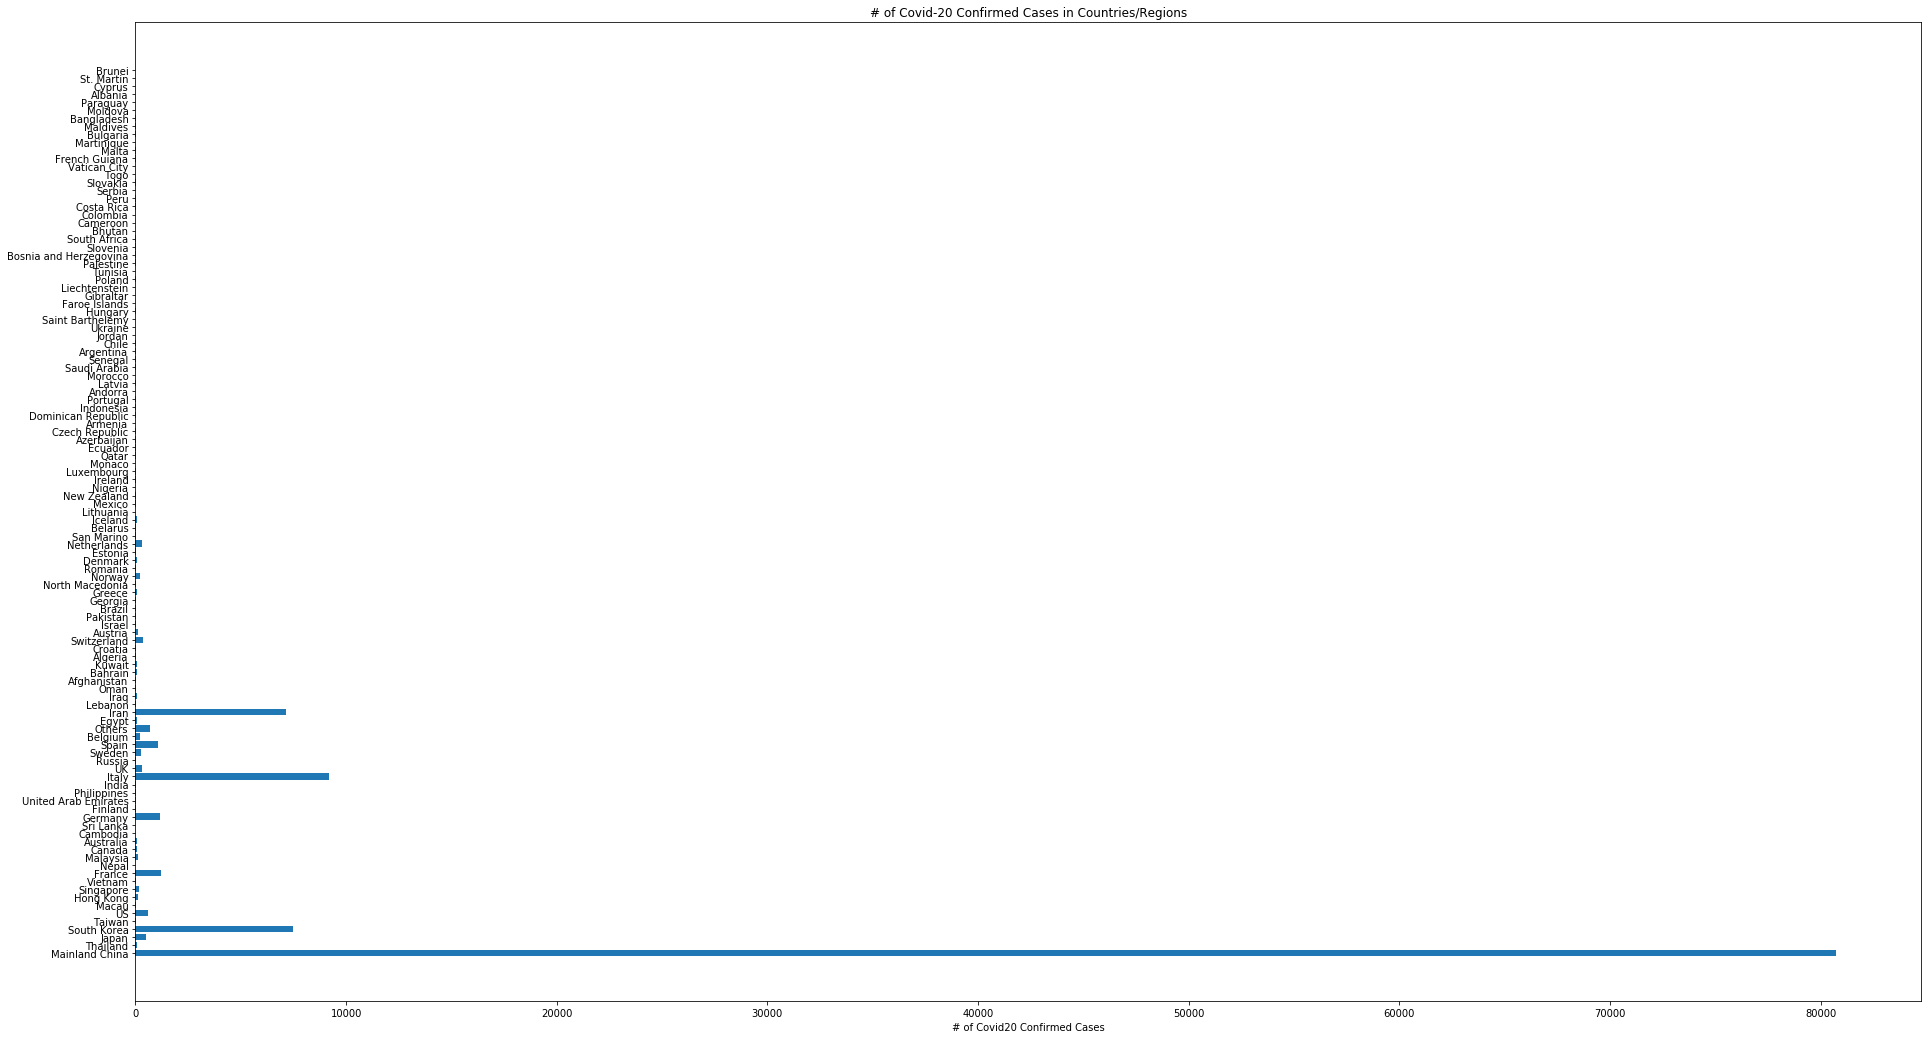

In [50]:
plt.figure(figsize=(32, 18))
plt.barh(unique_countries, country_confirmed_cases)
plt.title('# of Covid-20 Confirmed Cases in Countries/Regions')
plt.xlabel('# of Covid20 Confirmed Cases')
plt.show()

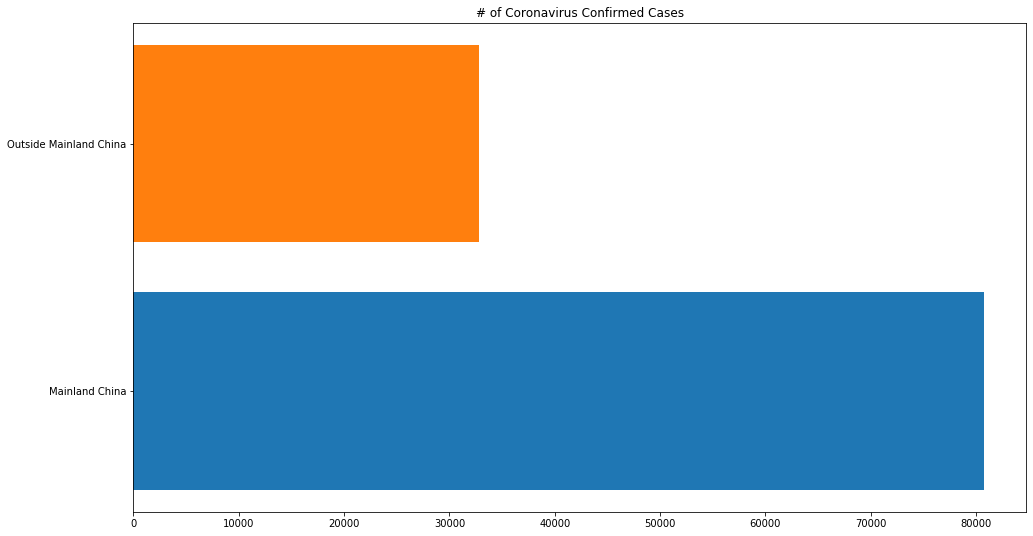

In [51]:
outside_mainland_china_confirmed = np.sum(country_confirmed_cases[1:])
plt.figure(figsize=(16, 9))
plt.barh(unique_countries[0], country_confirmed_cases[0])
plt.barh('Outside Mainland China', outside_mainland_china_confirmed)
plt.title('# of Coronavirus Confirmed Cases')
plt.show()

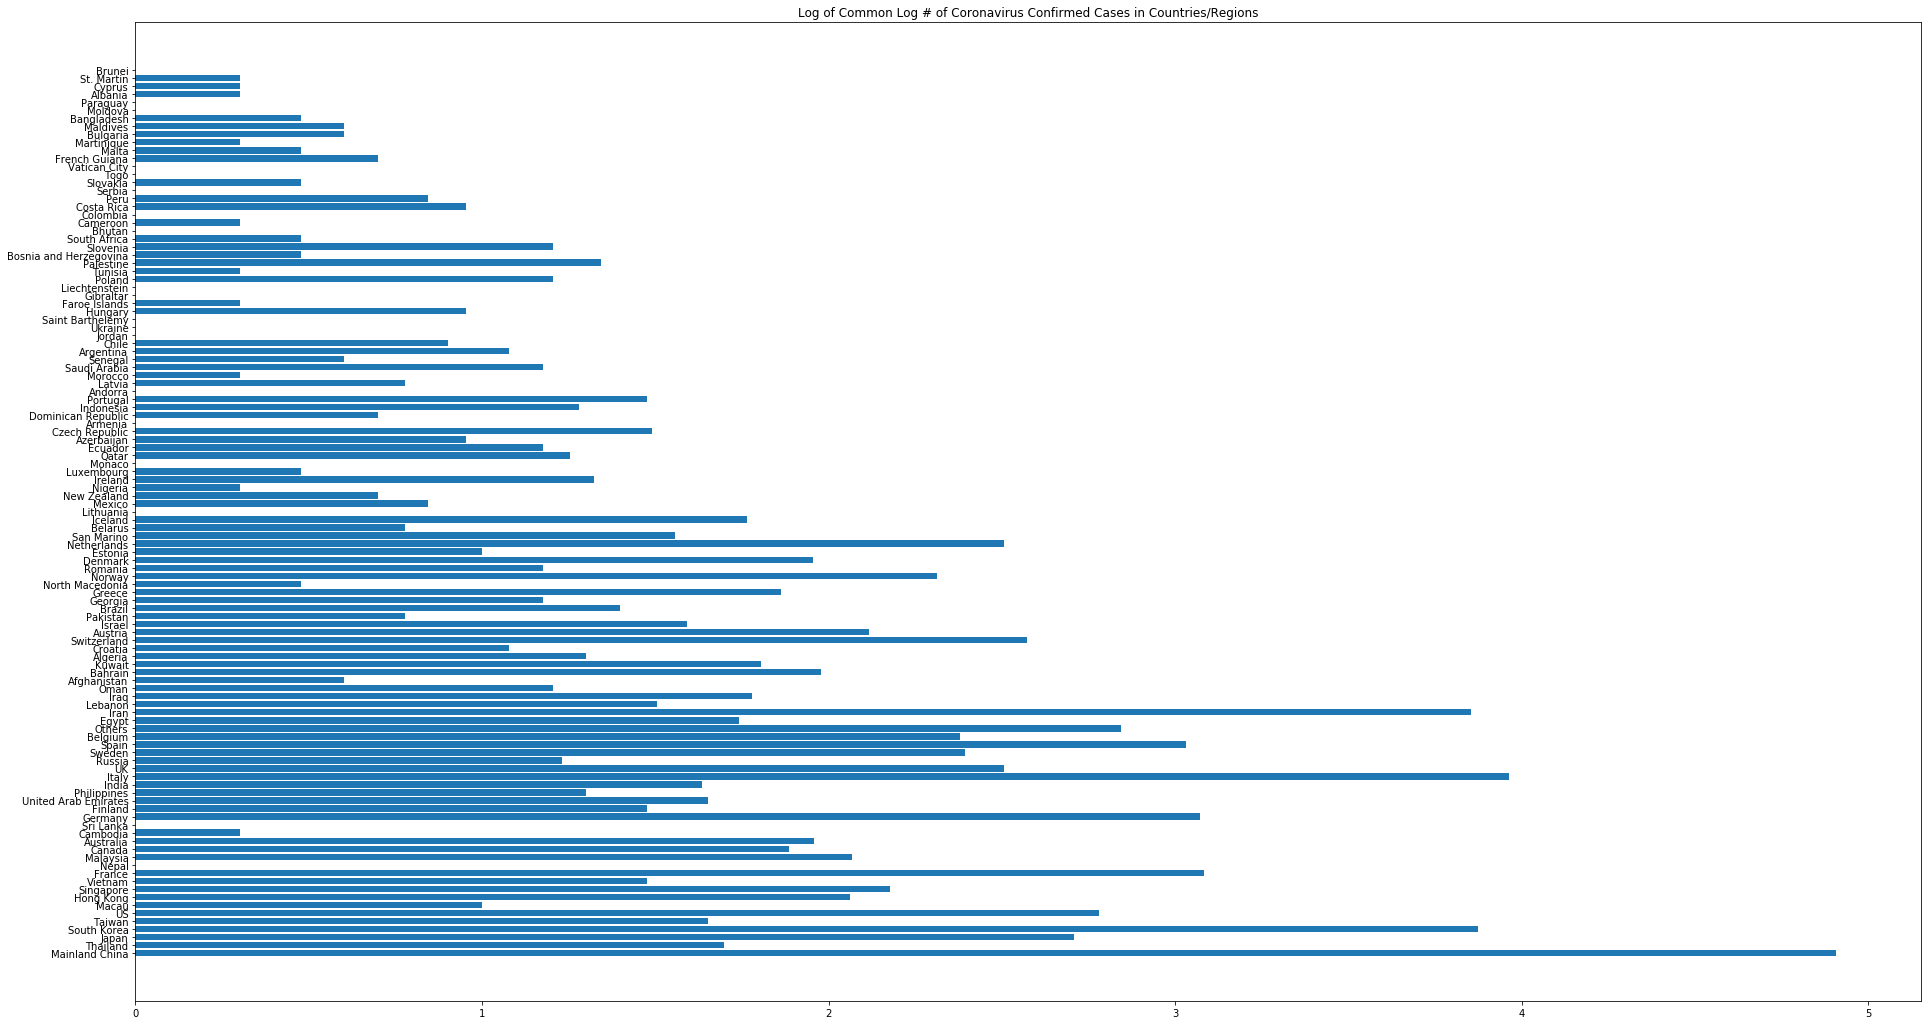

In [52]:
# lets look at it in a logarithmic scale 
log_country_confirmed_cases = [math.log10(i) for i in country_confirmed_cases]
plt.figure(figsize=(32, 18))
plt.barh(unique_countries, log_country_confirmed_cases)
plt.title('Log of Common Log # of Coronavirus Confirmed Cases in Countries/Regions')
plt.show()

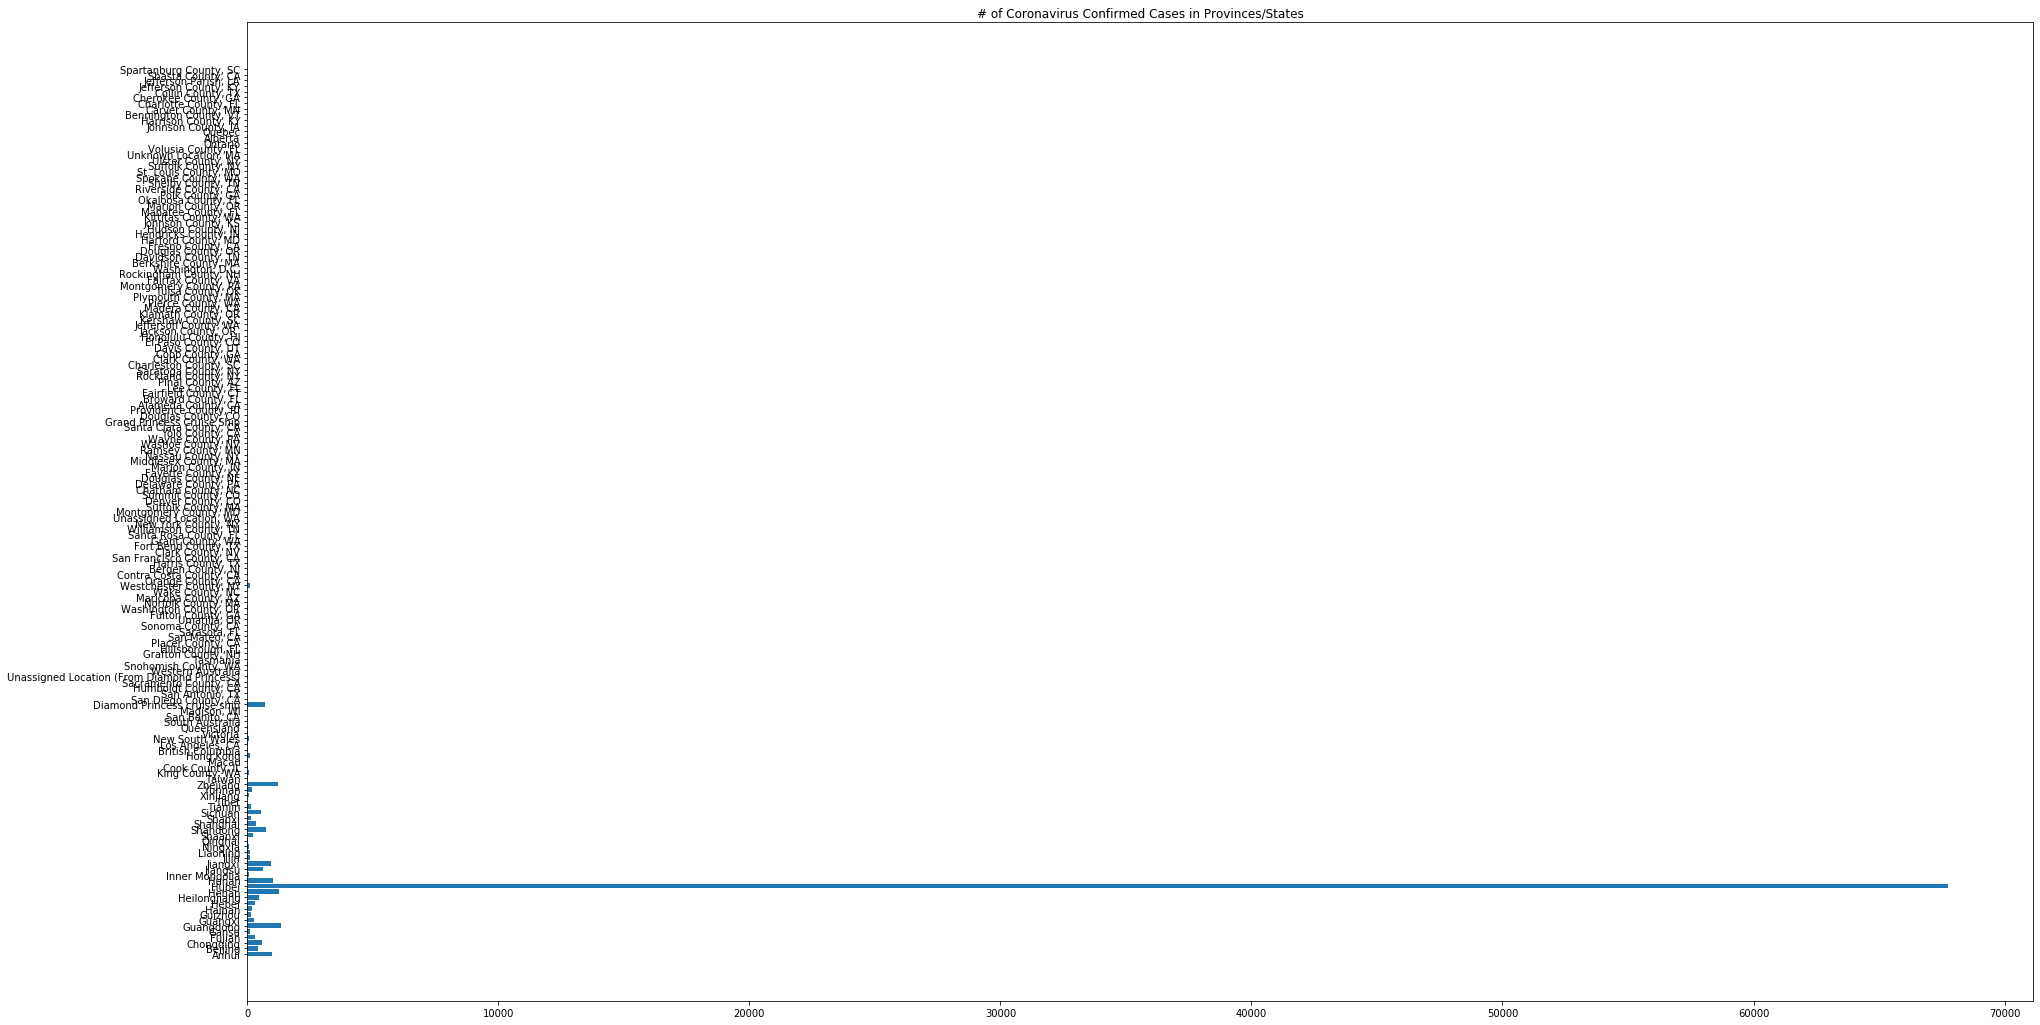

In [53]:
plt.figure(figsize=(32, 18))
plt.barh(unique_provinces, province_confirmed_cases)
plt.title('# of Coronavirus Confirmed Cases in Provinces/States')
plt.show()

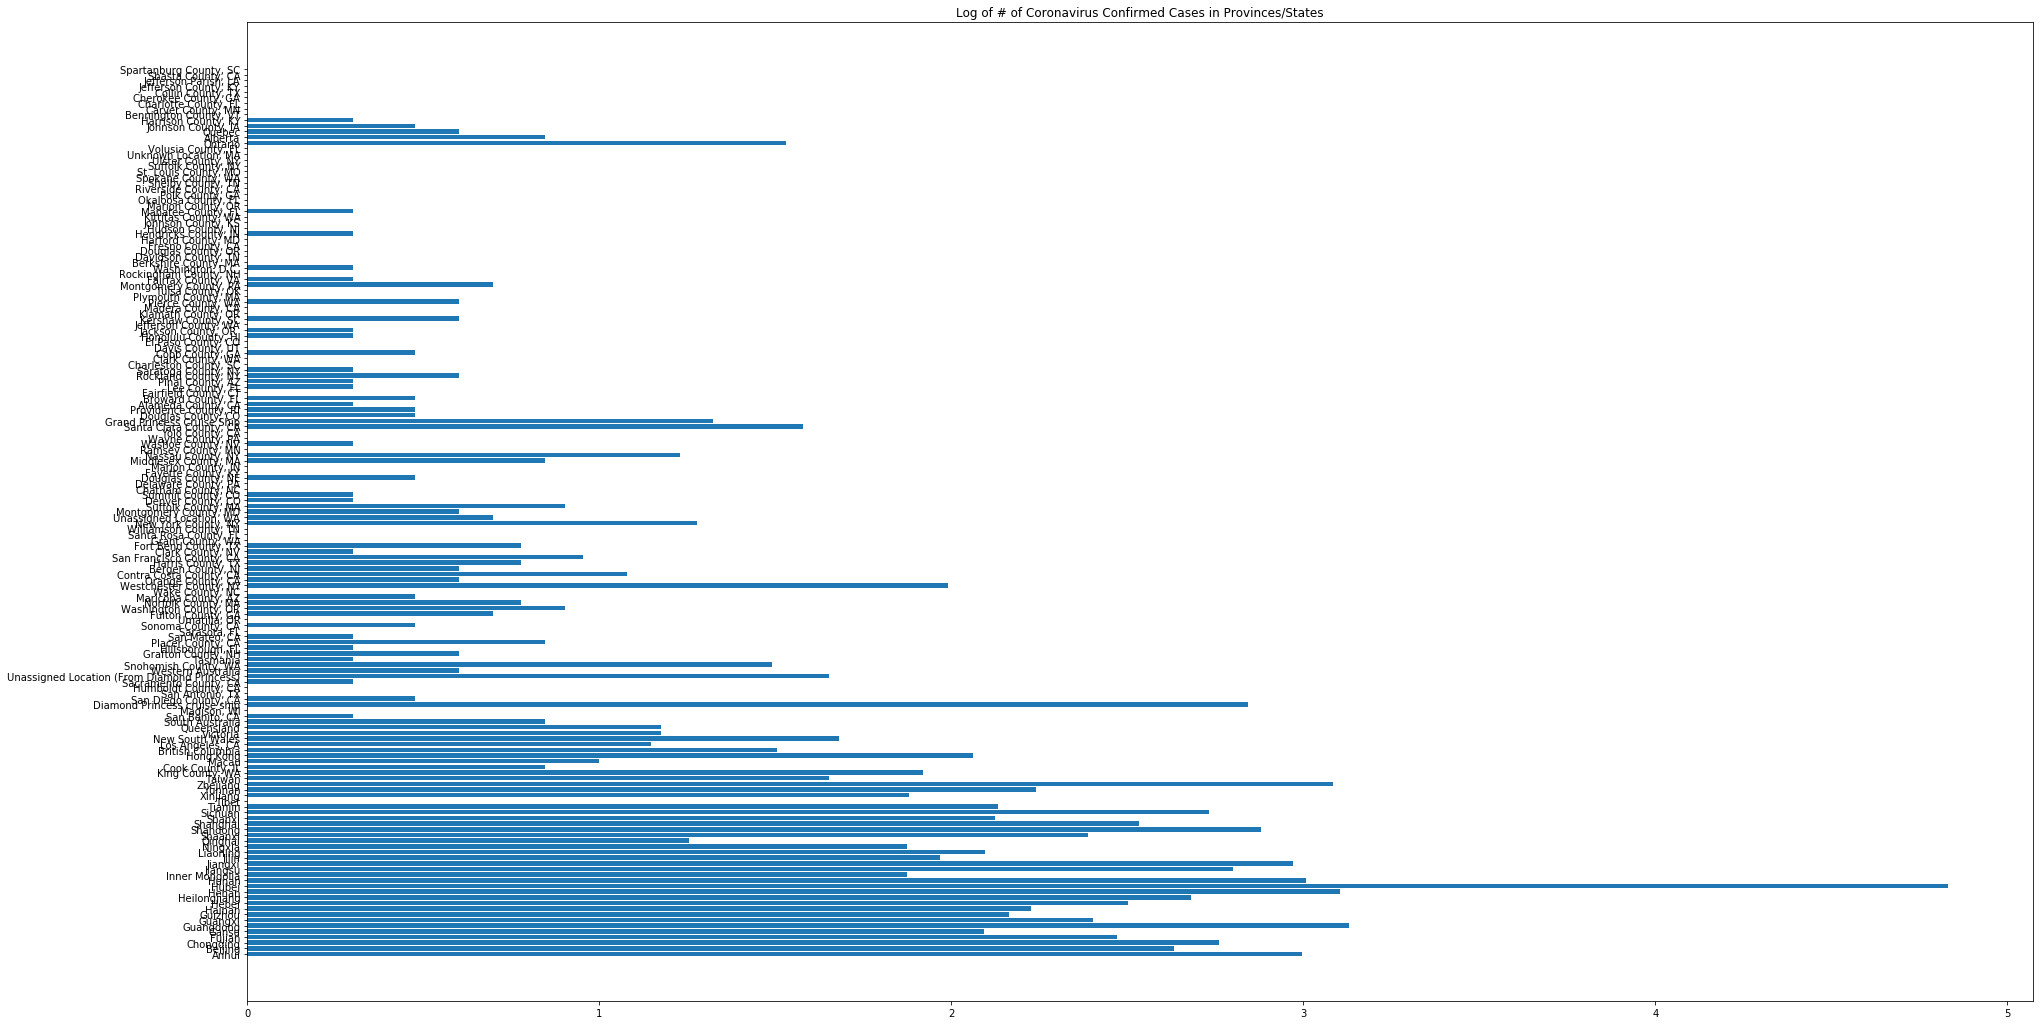

In [54]:
log_province_confirmed_cases = [math.log10(i) for i in province_confirmed_cases]
plt.figure(figsize=(32, 18))
plt.barh(unique_provinces, log_province_confirmed_cases)
plt.title('Log of # of Coronavirus Confirmed Cases in Provinces/States')
plt.show()

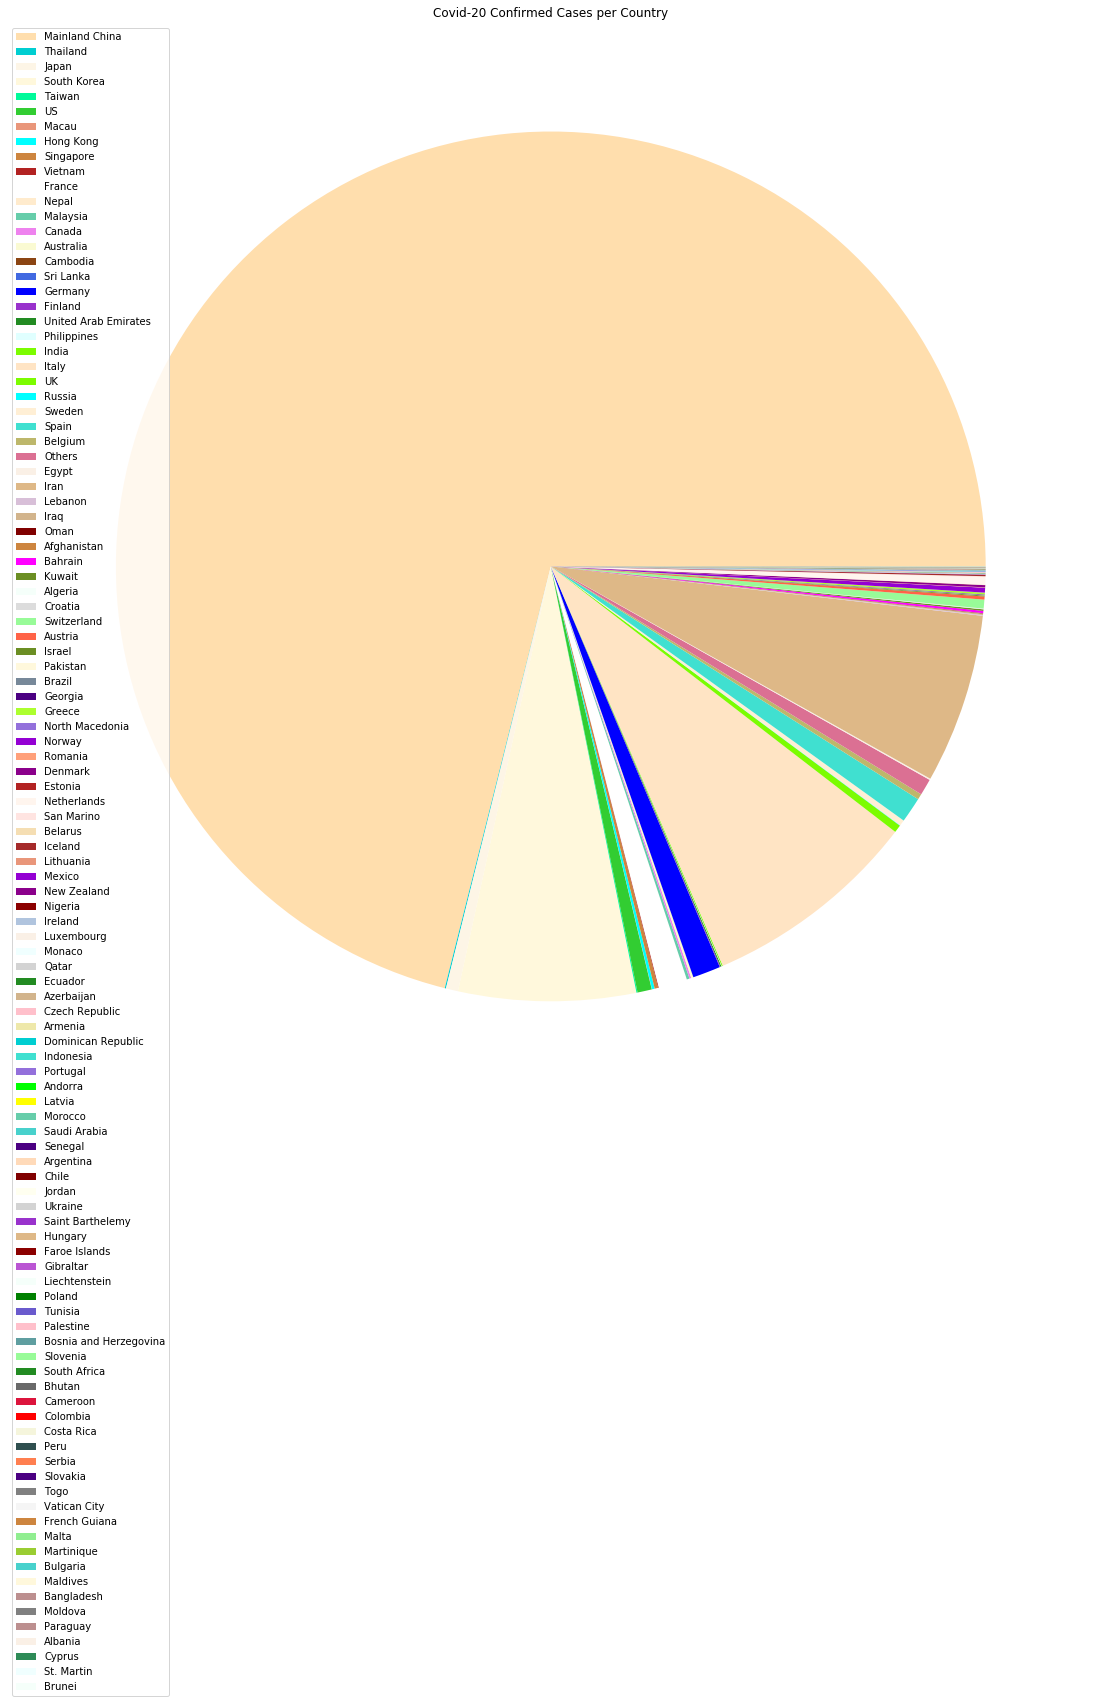

In [62]:
c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
plt.figure(figsize=(20,20))
plt.title('Covid-20 Confirmed Cases per Country')
plt.pie(country_confirmed_cases, colors=c)
plt.legend(unique_countries, loc='best')
plt.show()

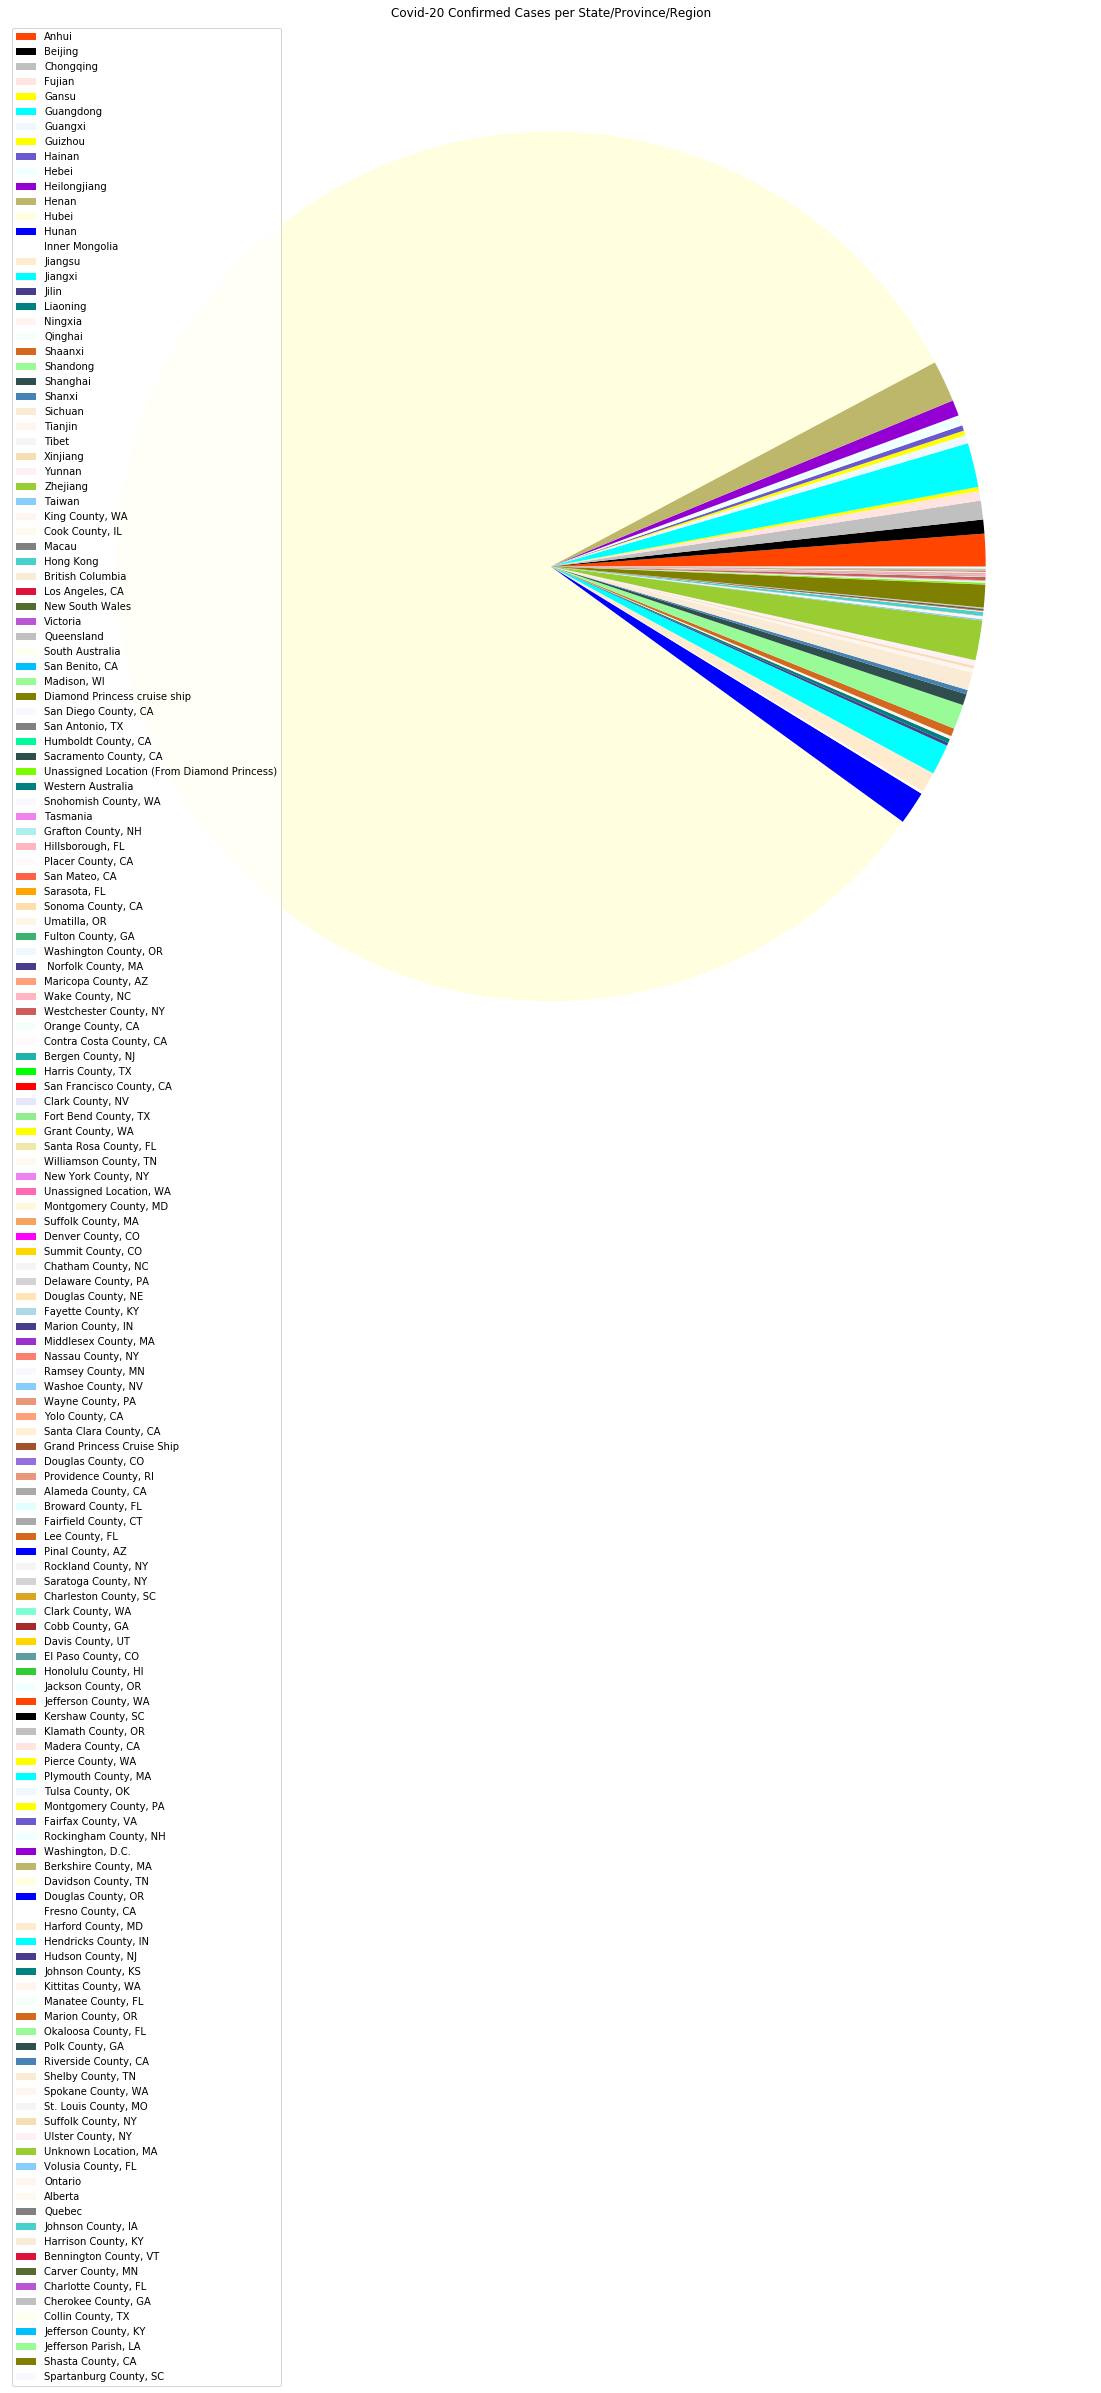

In [63]:
c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
plt.figure(figsize=(20,20))
plt.title('Covid-20 Confirmed Cases per State/Province/Region')
plt.pie(province_confirmed_cases, colors=c)
plt.legend(unique_provinces, loc='best')
plt.show()

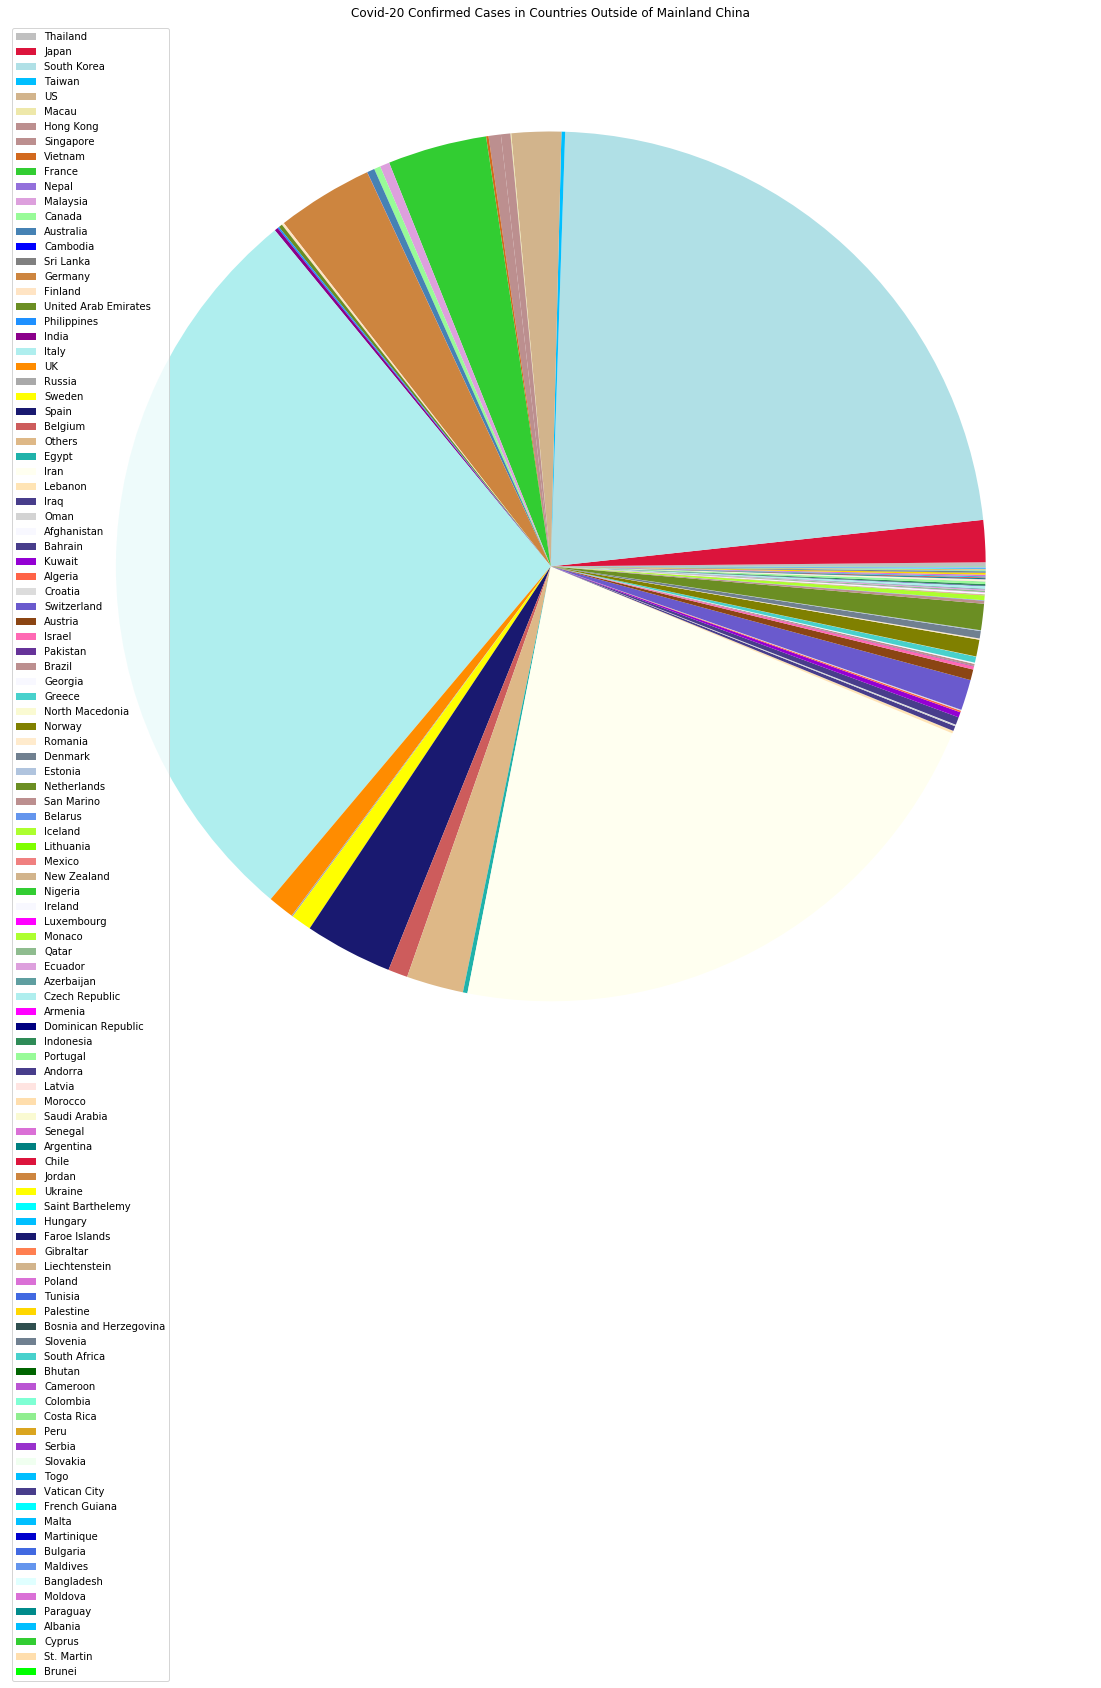

In [64]:
c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
plt.figure(figsize=(20,20))
plt.title('Covid-20 Confirmed Cases in Countries Outside of Mainland China')
plt.pie(country_confirmed_cases[1:], colors=c)
plt.legend(unique_countries[1:], loc='best')
plt.show()

In [58]:
us_regions = list(confirmed_df[confirmed_df['Country/Region']=='US']['Province/State'].unique())
us_confirmed_cases = []
no_cases = [] 
for i in us_regions:
    cases = latest_confirmed[confirmed_df['Province/State']==i].sum()
    if cases > 0:
        us_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
 
# remove areas with no confirmed cases
for i in no_cases:
    us_regions.remove(i)

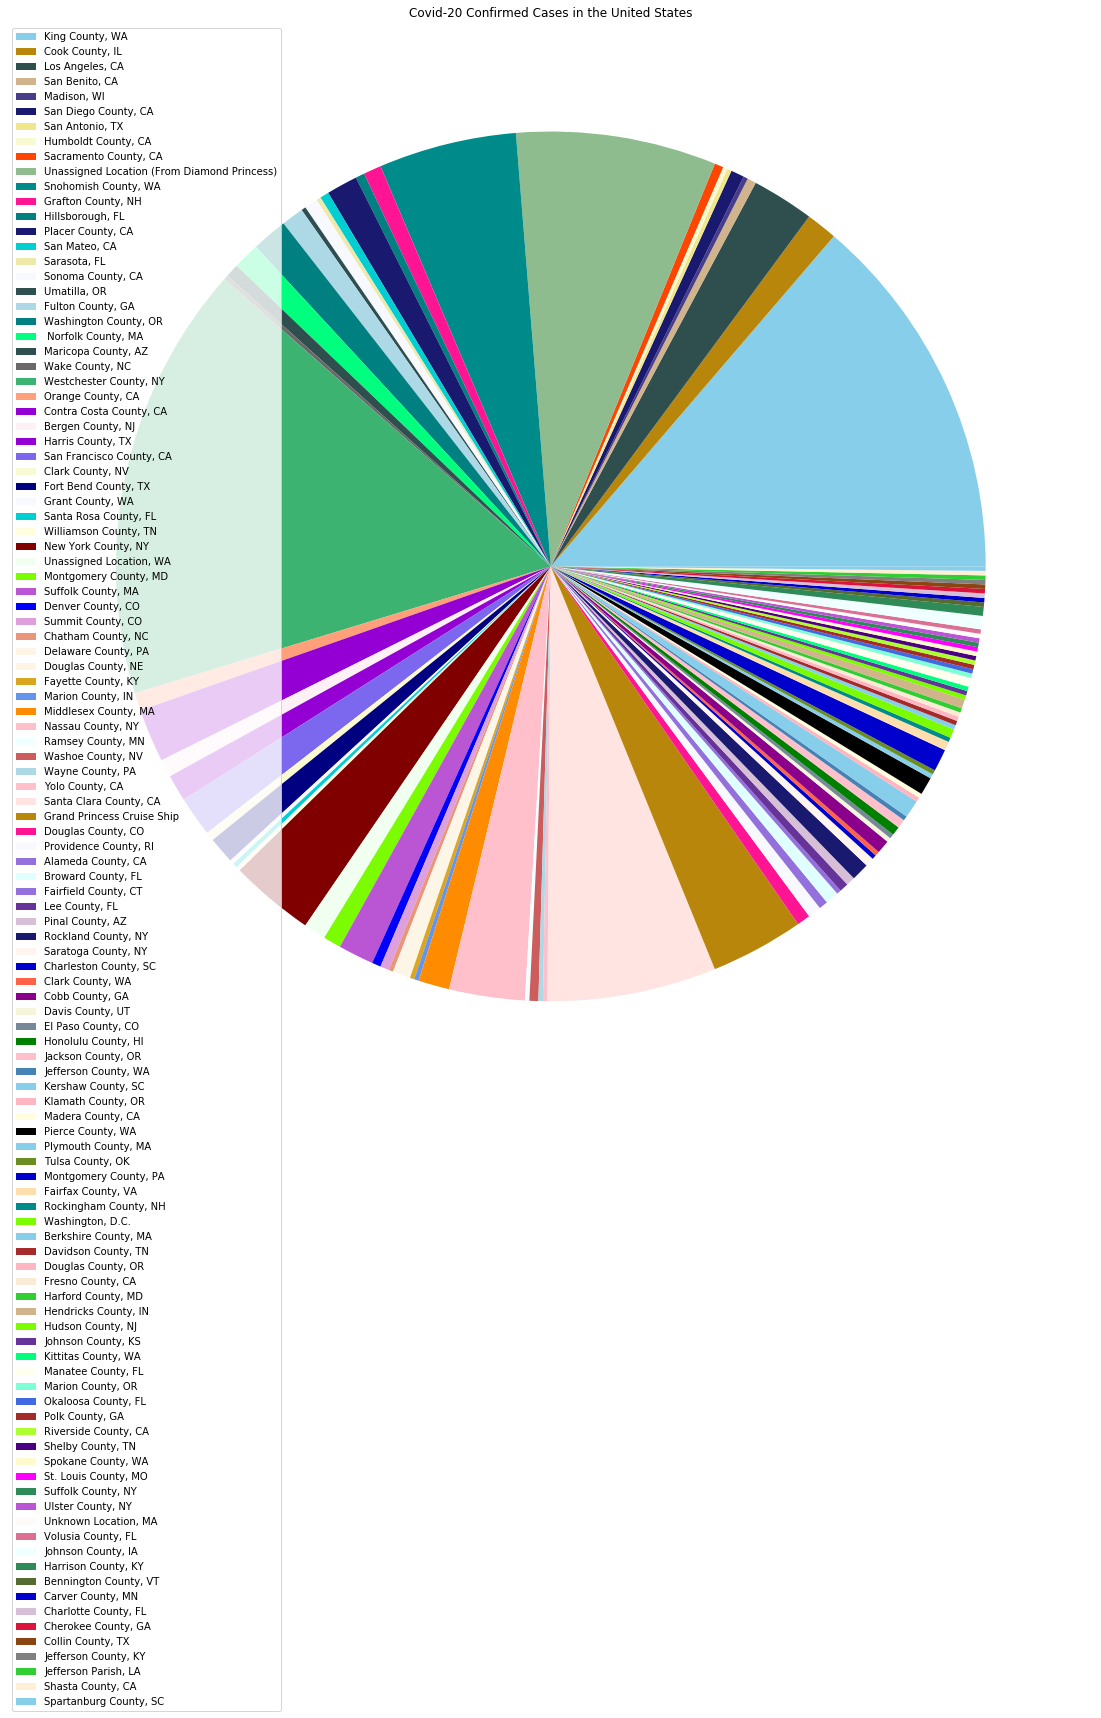

In [65]:
c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
plt.figure(figsize=(20,20))
plt.title('Covid-20 Confirmed Cases in the United States')
plt.pie(us_confirmed_cases, colors=c)
plt.legend(us_regions, loc='best')
plt.show()

In [60]:
china_regions = list(confirmed_df[confirmed_df['Country/Region']=='Mainland China']['Province/State'].unique())
china_confirmed_cases = []
no_cases = [] 
for i in china_regions:
    cases = latest_confirmed[confirmed_df['Province/State']==i].sum()
    if cases > 0:
        china_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
 
# remove areas with no confirmed cases
for i in no_cases:
    china_confirmed_cases.remove(i)

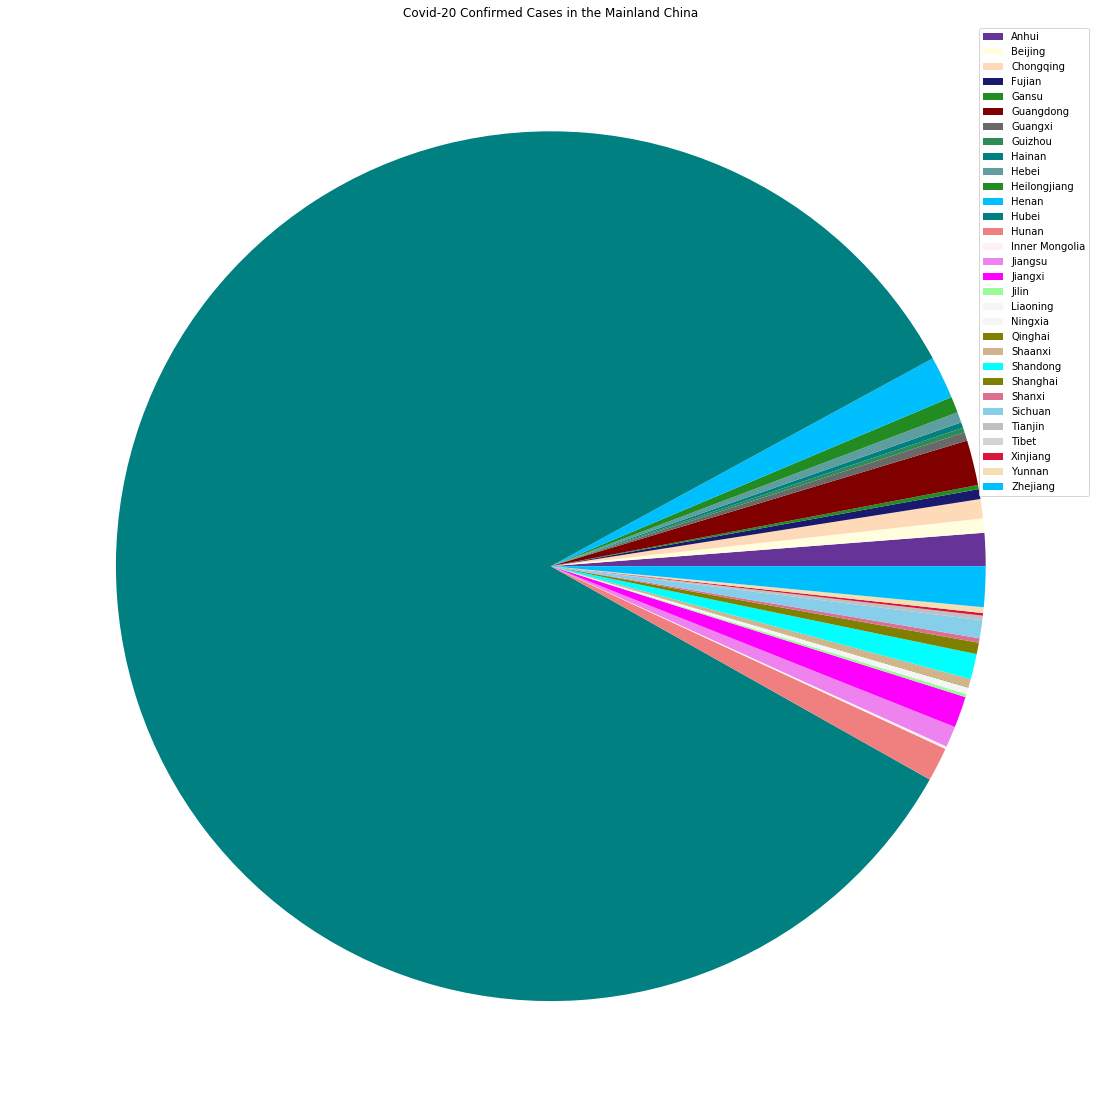

In [66]:
c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
plt.figure(figsize=(20,20))
plt.title('Covid-20 Confirmed Cases in the Mainland China')
plt.pie(china_confirmed_cases, colors=c)
plt.legend(china_regions, loc='best')
plt.show()